<a href="https://colab.research.google.com/github/lauBit/relacion-minutos-ingreso/blob/main/Calidad_del_vino_(_Regresion_Logistica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 1 – Predecir la calidad del Vino

Participantes:
- Paola Romero
- Laura Camelo
- Fernando Montaño
- Daniel Garcia

**Explicación Breve del Problema**

El objetivo es plantear dos modelos para evaluar la calidad de las variedades rojas del vino portugués “Vinho Verde” según características físico-químicas.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

df = pd.DataFrame()
df = pd.read_csv('https://raw.githubusercontent.com/lauBit/relacion-minutos-ingreso/main/winequality-red.csv', sep=';')

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
print('Cantidad de Filas y columnas:',df.shape)

Cantidad de Filas y columnas: (1599, 12)


In [19]:
print('Nombre columnas:',df.columns)

Nombre columnas: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


# **5. Determine la cantidad de variables y registros, indique cuales son numéricas y cualitativas y haga un resumen de esa información**

**Determine la cantidad de variables y registros, indique cuales son numéricas y cualitativas y haga un resumen de esa información**

**Cantidad de Variables**: 12

**Total de Registros por Variable**: 1599

**Clasificación de Variables**:
- `fixed acidity`: Númerica
- `volatile acidity`: Númerica
- `citric acid`: Númerica
- `residual sugar`: Númerica
- `chlorides`: Númerica
- `free sulfur dioxide`: Númerica
- `total sulfur dioxide`: Númerica
- `density`: Númerica
- `pH`: Númerica
- `sulphates`: Númerica
- `alcohol`: Númerica
- `quality`: Númerica


In [20]:
corr = df.corr()
print(corr)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

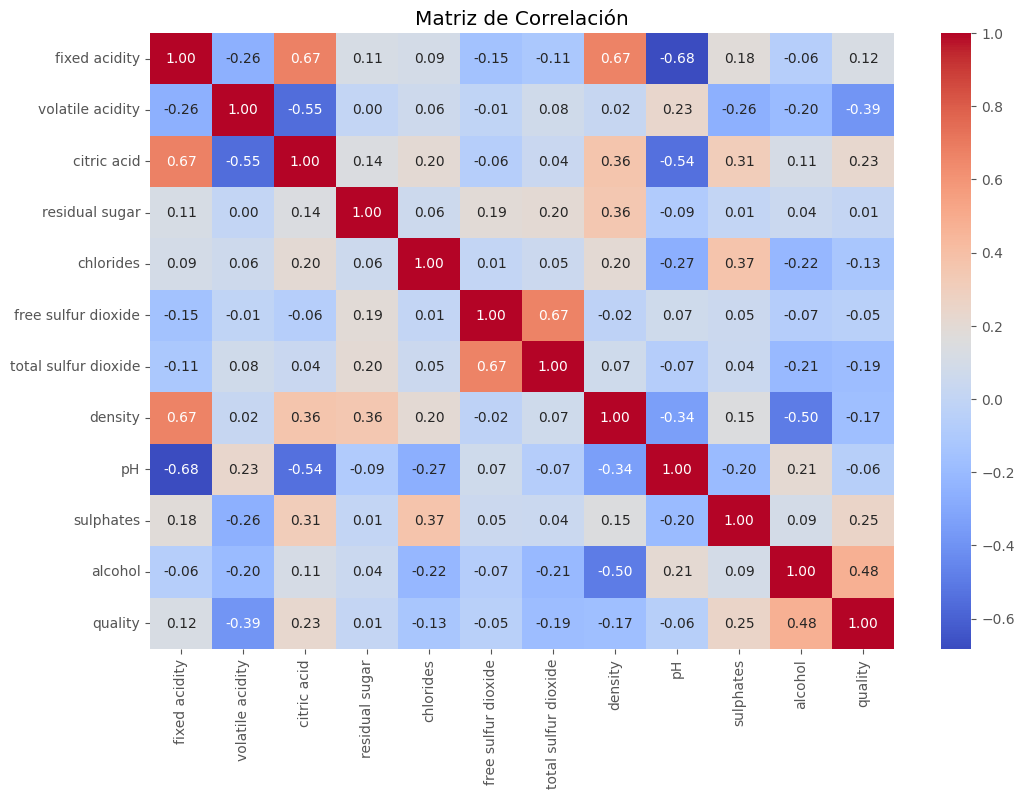

In [21]:
# Graficar la matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title('Matriz de Correlación')
plt.show()

Evidenciamos que la variable de calidad ("quality") no se encuentra altamente correlacionada con ninguna de las 11 variables fisico-quimicas. Se observa una correlación positiva de mediana intensidad entre las variables de calidad y alcohol, sin embargo cabe aclarar que una no indica causalidad de la otra.

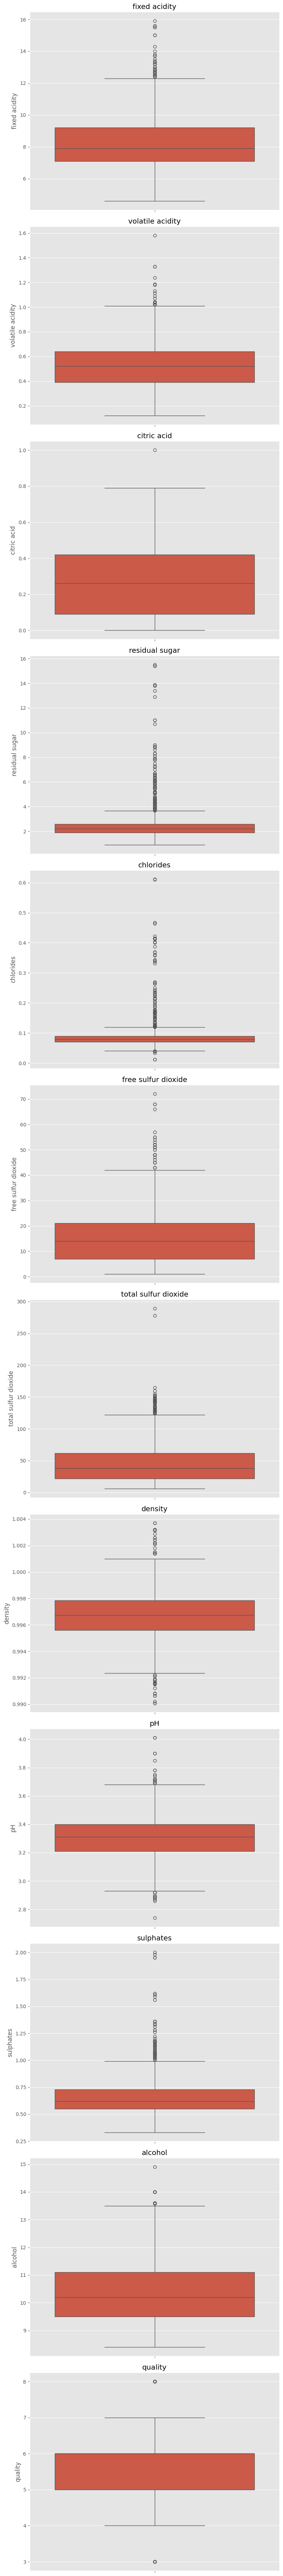

In [22]:
# Transponer el DataFrame
df_transpuesto = df.T

# Crear un gráfico de boxplot para cada fila transpuesta
fig, axs = plt.subplots(len(df_transpuesto), 1, figsize=(8, 6*len(df_transpuesto)), sharex=True)

for i, columna in enumerate(df_transpuesto.index):
    sns.boxplot(data=df_transpuesto.loc[columna], ax=axs[i])
    axs[i].set_title(columna)  # Establecer el título como el nombre de la columna
    axs[i].set_xlabel('')  # Eliminar la etiqueta del eje x para mayor claridad

# Ajustar el diseño de los gráficos
plt.tight_layout()

plt.show()

Se observa que la mayoria de las variables presenta alta dispersión en los datos, sin embargo no se observan registros que requieran ser depurados para el desarrollo de la actividad.

# **7. Asumiremos que si quality es mayor o igual a 6 entonces el vino es bueno, en otro caso diremos que tiene calidad regular. Haga una variable nueva con esta condición y llámela categorical_quality. Esta nueva variable será la variable objetivo de nuestra regresión logística.

In [23]:
df['categorical_quality'] = np.where(df['quality'] >=6,'bueno','regular')

df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,categorical_quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,regular
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,bueno
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,bueno
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,regular
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,bueno


In [24]:
# Se agrupa por quality - Cuenta cuantos registros de cada cateogria hay
print(df.groupby('categorical_quality').size())

categorical_quality
bueno      855
regular    744
dtype: int64


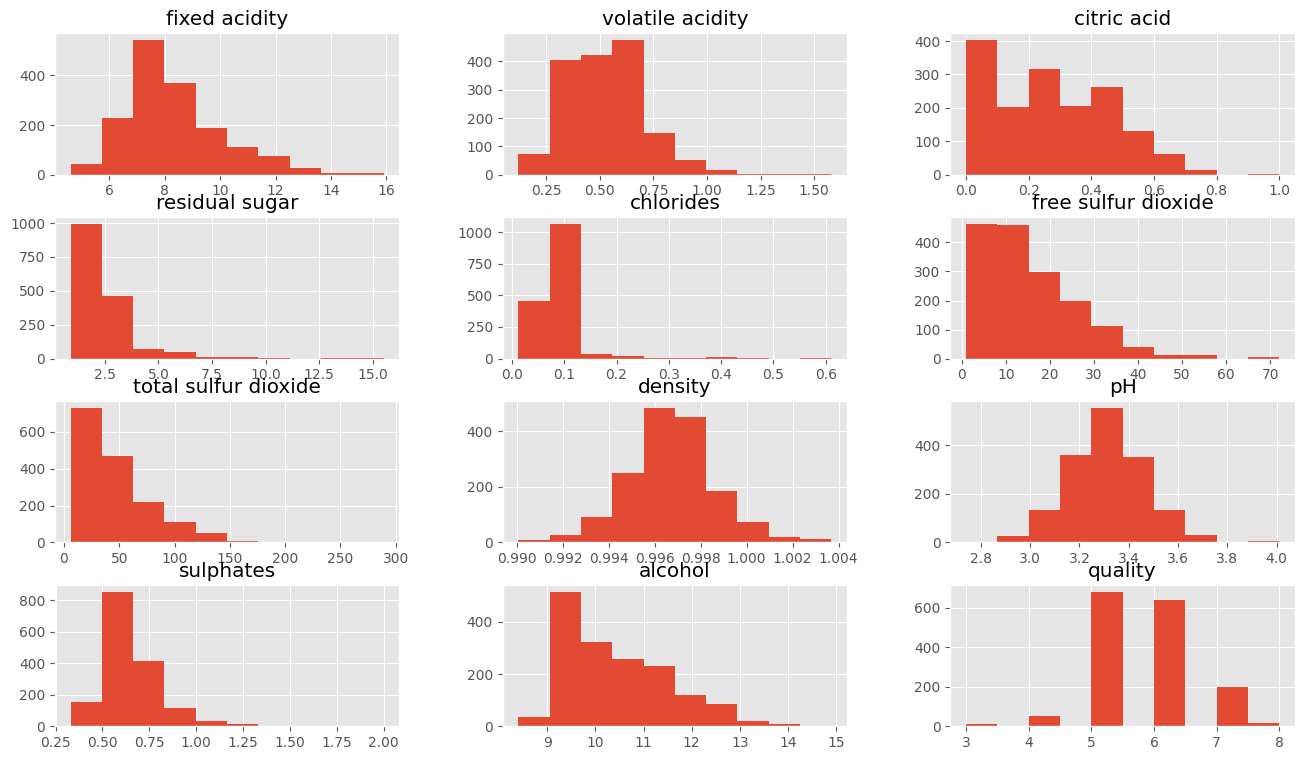

In [25]:
#Se elimina la columna  y se genera el histograma
df.drop('categorical_quality', axis=1).hist()
# Se muestra la gráfica
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


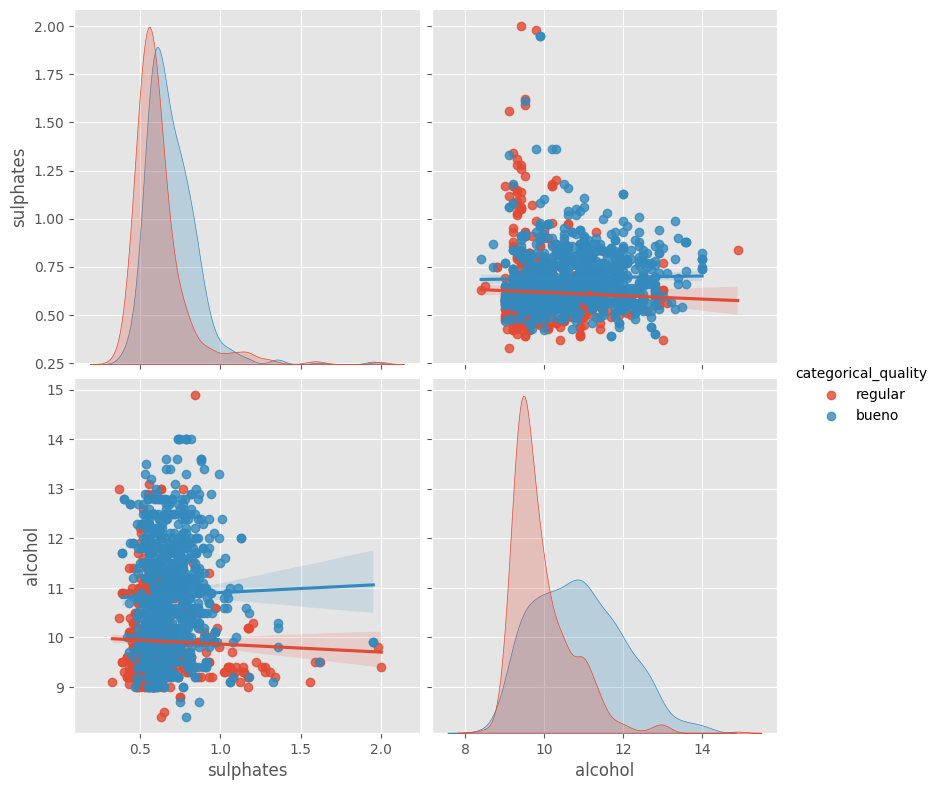

In [26]:
# crea una cuadrícula de gráficos de dispersión para visualizar las relaciones entre pares de variables
# Elimina cualquier fila que contenga valores perdidos (NaN)

sns.pairplot(df.dropna(), hue='categorical_quality',size=4,vars=["sulphates", "alcohol"],kind='reg')



In [27]:
X = np.array(df.drop(['categorical_quality'], axis=1))  # Elimina la columna 'quality' del DataFrame
y = np.array(df['categorical_quality'])  # La columna 'quality' se convierte en el vector de etiquetas
print(X.shape)  # Muestra la forma de X después de eliminar 'quality'


(1599, 12)


In [28]:
# Se realiza la regresión logistica
model = linear_model.LogisticRegression()
# Se ajusta el modelo de datos
model.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
predictions = model.predict(X)
print(predictions)  # Imprime los primeros 5 elementos de predictions


['regular' 'regular' 'regular' ... 'bueno' 'regular' 'bueno']


In [30]:
model.score(X,y)


0.9987492182614134

EL model Score nos indica que  este modelo es capaz de predecir con un 99% la variabilidad del atributo "Quality", por lo que podemos decir que este modelo es mejor en comparación de la regresión lineal que nos da una predicción del 27%


**8. Haga una partición de la base 80-20 para determinar base de entrenamiento y testeo para la regresión logística. Posteriormente, entrene la regresión logística con la base de entrenamiento.**

In [31]:
from sklearn import model_selection

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=0.20, random_state=45)

In [32]:
from sklearn.model_selection import KFold

name='Logistic Regression'
kfold = KFold(n_splits=3, shuffle=True, random_state=45)  # Habilita shuffle y establece random_state
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

# Precisión media del modelo
#Desviación Estandar de la precisión de los pliegues de la validación cruzada

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.999218 (0.001107)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [33]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))


0.996875


In [34]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_validation, predictions))

[[173   1]
 [  0 146]]


In [35]:
from sklearn.metrics import classification_report

print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

       bueno       1.00      0.99      1.00       174
     regular       0.99      1.00      1.00       146

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



Los estadisticos de validación nos muestran una efectividad de mas de 99% del modelo, sin emabrgo, los datos de la BD de entrenamiento y pruebas son pocos por lo que se deberian obtener mas datos para validar la efectividad generada.

**11. En un párrafo explique ¿Cuál de los dos modelos fue mejor? Justifique adecuadamente su respuesta.**

Al observar los resultados obtenidos en los modelos de regresión lineal y regresión logística, identificamos mejor resultado con el modelo de regresión logistica dado que se obtiene una efectividad del modelo de más del 99% en comparación al 36% obtenido en la regresíón lineal.